In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import matplotlib.cm as cm
import math
from math import pi
import itertools
import os
import csv
import glob
import pygal
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [75]:
market = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/market.csv")

In [76]:
market.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element',
       'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'minutes', 'opponent_team', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'Player name', 'team', 'ppm'],
      dtype='object')

In [77]:
liverpool_players = market[market['team'] == 'Liverpool']

In [99]:
liverpool_players.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element',
       'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'minutes', 'opponent_team', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'Player name', 'team', 'ppm',
       'predicted_value'],
      dtype='object')

In [78]:
features = ['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'goals_conceded', 'goals_scored', 'ict_index',
            'influence', 'minutes', 'threat', 'total_points', 'value', 'was_home', 'yellow_cards']

In [79]:
X = liverpool_players[features]
y = liverpool_players['value']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.3608217527111394e-28


In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
# Get the coefficients (weights) of the linear regression model
coefficients = model.coef_

# Calculate the absolute feature importances
feature_importances = np.abs(coefficients)

# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

In [87]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    SVR(),
    GradientBoostingRegressor()
]

In [88]:
from sklearn.model_selection import cross_val_score

model_names = ['Linear Regression', 'Random Forest', 'SVR', 'Gradient Boosting']
scores = []

for model, name in zip(models, model_names):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    mean_rmse = np.mean(rmse_scores)

    # Store the mean RMSE score
    scores.append(mean_rmse)

    # Print the results
    print(f"{name}: Mean RMSE = {mean_rmse:.2f}")

Linear Regression: Mean RMSE = 0.00
Random Forest: Mean RMSE = 0.07
SVR: Mean RMSE = 1.23
Gradient Boosting: Mean RMSE = 0.07


In [89]:
# Create a DataFrame to compare the models
model_comparison = pd.DataFrame({'Model': model_names, 'Mean RMSE': scores})
model_comparison = model_comparison.sort_values('Mean RMSE')

# Print the model comparison
print(model_comparison)

               Model     Mean RMSE
0  Linear Regression  9.560435e-15
3  Gradient Boosting  6.982995e-02
1      Random Forest  7.420389e-02
2                SVR  1.230128e+00


In [100]:
predicted_values = liverpool_players['predicted_value']
statistics = predicted_values.describe()
print(statistics)

count    1072.000000
mean        5.974347
std         2.090163
min         3.900000
25%         4.500000
50%         5.400000
75%         6.300000
max        12.800000
Name: predicted_value, dtype: float64


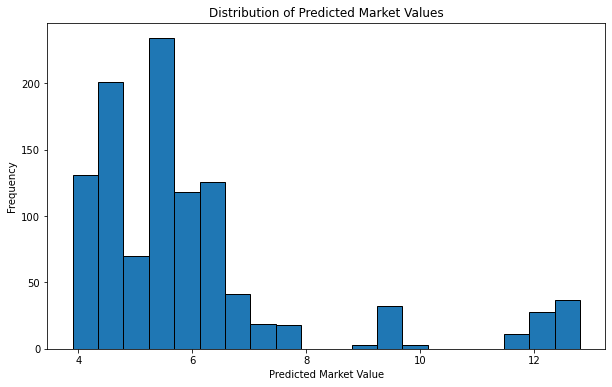

In [101]:
plt.figure(figsize=(10, 6))
plt.hist(predicted_values, bins=20, edgecolor='k')
plt.xlabel('Predicted Market Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Market Values')
plt.show()

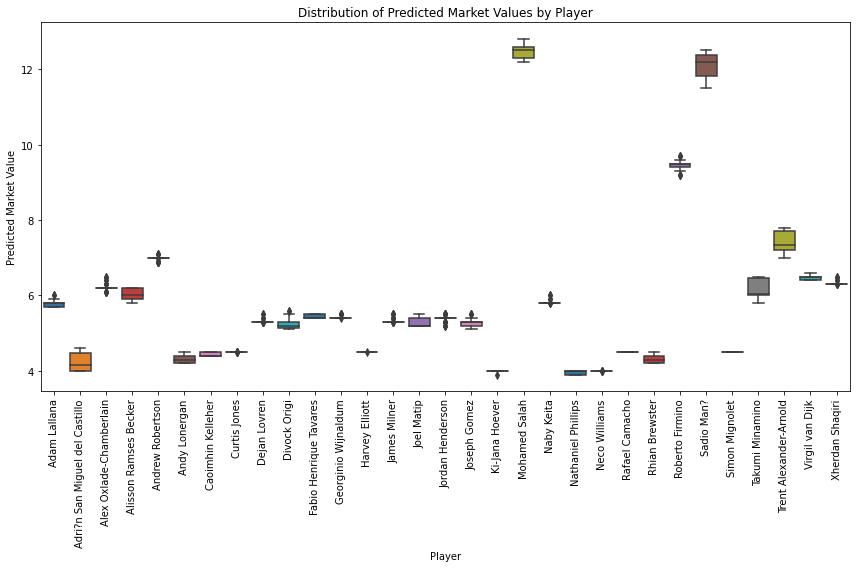

In [106]:
# Create a boxplot for each player's predicted market values
plt.figure(figsize=(12, 8))
sns.boxplot(x='Player name', y='predicted_value', data=liverpool_players, palette='tab10')
plt.xlabel('Player')
plt.ylabel('Predicted Market Value')
plt.title('Distribution of Predicted Market Values by Player')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/var/folders/96/qqlkbqys6kqb27dyfw97gdz40000gp/T/ipykernel_86401/802720241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_players['predicted_value'] = model.predict(X)


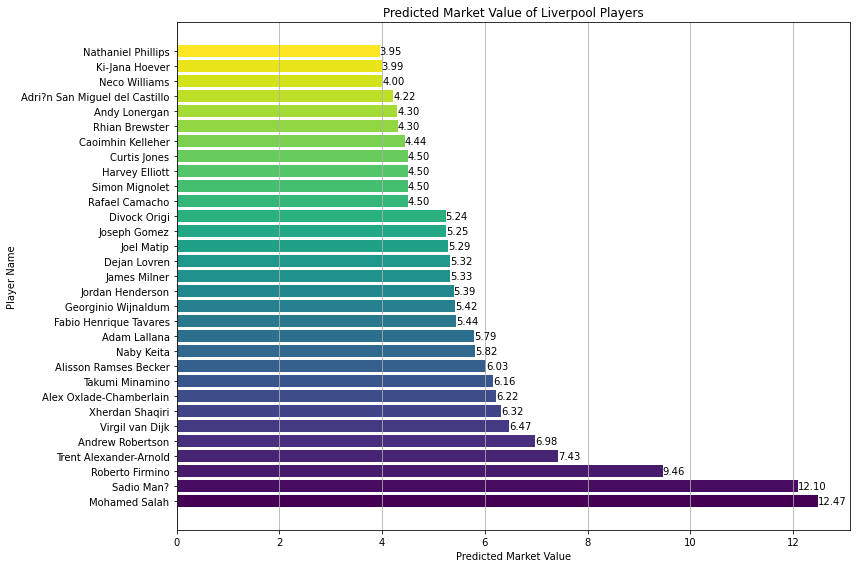

In [84]:
# Add a new column 'predicted_value' to the original dataframe with the predicted values
liverpool_players['predicted_value'] = model.predict(X)

# Group the data by player name and calculate the average predicted value
grouped_data = liverpool_players.groupby('Player name')['predicted_value'].mean().reset_index()

# Sort the players based on predicted market value in descending order
grouped_data = grouped_data.sort_values('predicted_value', ascending=False)

# Set a color palette for the bar plot
colors = cm.viridis(np.linspace(0, 1, len(grouped_data)))

# Create a bar plot with custom colors and horizontal orientation
plt.figure(figsize=(12, 8))
plt.barh(y=grouped_data['Player name'], width=grouped_data['predicted_value'], color=colors)

# Add data labels to the bars
for i, value in enumerate(grouped_data['predicted_value']):
    plt.text(value, i, f"{value:.2f}", va='center')

# Customize the plot aesthetics
plt.xlabel('Predicted Market Value')
plt.ylabel('Player Name')
plt.title('Predicted Market Value of Liverpool Players')
plt.grid(axis='x')
plt.tight_layout()

plt.show()

/var/folders/96/qqlkbqys6kqb27dyfw97gdz40000gp/T/ipykernel_86401/2660379726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_players['predicted_value'] = model.predict(X)


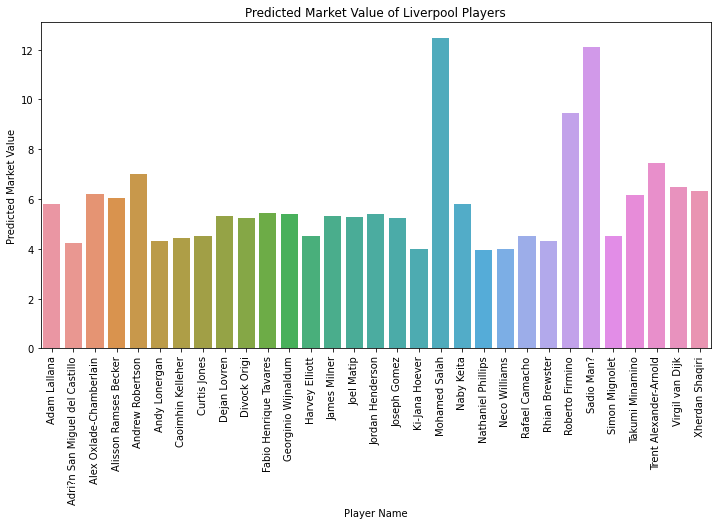

In [83]:
# Add a new column 'predicted_value' to the original dataframe with the predicted values
liverpool_players['predicted_value'] = model.predict(X)

# Group the data by player name and calculate the average predicted value
grouped_data = liverpool_players.groupby('Player name')['predicted_value'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Player name', y='predicted_value', data=grouped_data)
plt.xlabel('Player Name')
plt.ylabel('Predicted Market Value')
plt.title('Predicted Market Value of Liverpool Players')
plt.xticks(rotation=90)
plt.show()